In [73]:
import numpy as np
import os
import pandas as pd

## Load Dataset: Beijing PM2.5

In [74]:
dataset_root = "../datasets/"
csvfile = os.path.join(dataset_root, "beijing_pm2.5", "PRSA_data_2010.1.1-2014.12.31.csv")
fields = ['year','month','day','DEWP','TEMP','PRES','Is','Ir'] # Specific columns to use.
df = pd.read_csv(csvfile, usecols=fields)
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir
0,2010,1,1,-21,-11.0,1021.0,0,0
1,2010,1,1,-21,-12.0,1020.0,0,0
2,2010,1,1,-21,-11.0,1019.0,0,0
3,2010,1,1,-21,-14.0,1019.0,0,0
4,2010,1,1,-20,-12.0,1018.0,0,0


In [75]:
# Create single date column from independent year/month/day columns.
df = df.assign(date=pd.to_datetime(df[['year','month','day']]))
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01


## Feature Definitions

List of plants to grow, with scores that rate their performance in a given interval of time. Scores should be floating-point numbers within a range (possibly from `[0,10]`) for each plant. The score matrix should have columns that correspond to each plant, and rows that correspond to each time interval.

For example:
```python
features = ['tomato', 'sunflower', 'cucumber']
scores = [[3, 7, 10], [2, 1, 5], [7, 9, 11]]
```

**Note**: The scores should eventually be normalized between `[0,1]` to accommodate different input score ranges.

In [76]:
# Add feature scores to the dataset.
# These scores should be normalized between [0,1].
features = ['tomato', 'sunflower', 'cucumber']
df = df.assign(**{feat:np.random.uniform(0.0, 1.0, size=df.shape[0]) for feat in features})
df.head()

,year,month,day,DEWP,TEMP,PRES,Is,Ir,date,tomato,sunflower,cucumber
0,2010,1,1,-21,-11.0,1021.0,0,0,2010-01-01,0.856295,0.280792,0.027386
1,2010,1,1,-21,-12.0,1020.0,0,0,2010-01-01,0.691807,0.852306,0.551290
2,2010,1,1,-21,-11.0,1019.0,0,0,2010-01-01,0.122731,0.164166,0.473226
3,2010,1,1,-21,-14.0,1019.0,0,0,2010-01-01,0.133846,0.125718,0.481965
4,2010,1,1,-20,-12.0,1018.0,0,0,2010-01-01,0.757694,0.151205,0.230403


In [77]:
# Ensure rows are in time-sorted ascending order.
df = df.sort_values(['date'], ascending=[True])

## Data Visualization

In [78]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Date')

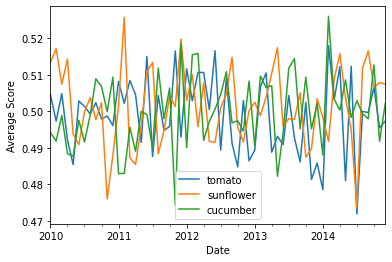

In [79]:
# Visualize average plant scores per month.
df.groupby(pd.Grouper(key='date', freq='M')).mean()[features].plot()
plt.ylabel('Average Score')
plt.xlabel('Date')